In [1]:
from astropy.table import Table, Column
import numpy as np
from numpy.linalg import inv 
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request

In [2]:
os.chdir("/Users/Roberto Benard Orci/Documents/Python Scripts")
os.getcwd()

'C:\\Users\\Roberto Benard Orci\\Documents\\Python Scripts'

In [5]:
Table1 = np.loadtxt(fname = "/Users/Roberto Benard Orci/Documents/Python Scripts/Table3.txt")

column_names = ['ID', 'x', 'y','Sigma y', 'Sigma x', 'Rho xy']

Table1 = pd.DataFrame(Table1, columns=column_names)

In [8]:
Matrix_Y_Transpose = np.array([Table1['y']])

Matrix_Y = Matrix_Y_Transpose.transpose()

In [13]:
LineOfOnes = np.linspace(1, 1, Table1['ID'].idxmax()+1)

Matrix_A_Transpose = np.array([LineOfOnes,Table1['x'],Table1['x']*Table1['x']])

Matrix_A = Matrix_A_Transpose.transpose()

Covariance_Matrix = np.diag(Table1['Sigma y']*Table1['Sigma y'])

Covariance_Matrix_Inverse = inv(Covariance_Matrix)

In [15]:
MAT_times_CMI = np.matmul(Matrix_A_Transpose,Covariance_Matrix_Inverse)

MAT_CMI_times_MA = np.matmul(MAT_times_CMI,Matrix_A)

MAT_CMI_times_MA_Inverse = inv(MAT_CMI_times_MA)

MAT_CMI_times_MY = np.matmul(MAT_times_CMI,Matrix_Y)

Matrix_X = np.matmul(MAT_CMI_times_MA_Inverse,MAT_CMI_times_MY)

In [20]:
b = Matrix_X[0].item()
m = Matrix_X[1].item()
q = Matrix_X[2].item()

print(q,m,b)

0.0022988884081209804 1.5960504522748806 72.89462647167238


In [21]:
def f(t):
    return q*t**2 + t*m +b

t3 = np.arange(0.0, 300.0, 0.1)
t4 = np.arange(0.0, 300.0, 0.02)

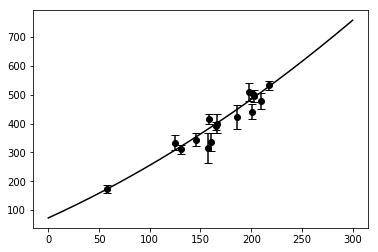

In [22]:
error = Table1['Sigma y']
plt.errorbar(Table1['x'], Table1['y'], yerr=error, fmt='ko',capsize=4)
plt.plot(t4, f(t4), 'k')